In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datasets.transforms import WM811KTransformTwo, WM811KTransformMultiple
from argparse import  Namespace
import logging
from itertools import product

In [89]:
def load_image_cv2(filepath: str):
    """Load image with cv2. Use with `albumentations`."""
    out = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # 2D; (H, W)
    return np.expand_dims(out, axis=2)  # 3D; (H, W, 1)

In [90]:
args = Namespace()
args.logger = logging.getLogger('test')
args.input_size_xy = 96

In [91]:
image = load_image_cv2('data/wm811k/labeled/test/center/000604.png')

In [92]:
image.shape

(26, 26, 1)

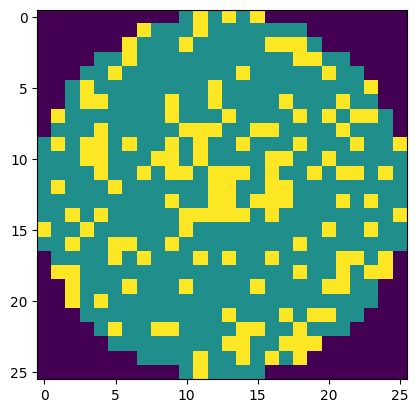

In [93]:
plt.imshow(np.array(image))

In [94]:
available_augs = ['rotate', 'crop', 'shift', 'noise', 'cutout']

In [95]:
pair_modes = list(product(available_augs, available_augs))

In [96]:
pair_magnitudes = [(np.random.rand(), np.random.rand()) for _ in range(len(pair_modes))]

('rotate', 'rotate') (0.3816487963857872, 0.29378028936857037)
('rotate', 'crop') (0.5896367390768725, 0.27273819087424866)
('rotate', 'shift') (0.5113780003676975, 0.3227703403950838)
('rotate', 'noise') (0.18575478300816906, 0.8478143345077174)
('rotate', 'cutout') (0.2332296661770501, 0.7473530206665988)
('crop', 'rotate') (0.5134508841166893, 0.44172808525352325)
('crop', 'crop') (0.24252580648671396, 0.9924385503760054)
('crop', 'shift') (0.816461479171545, 0.15424289511753253)
('crop', 'noise') (0.8693409695311911, 0.15357754286726533)
('crop', 'cutout') (0.5013899588107098, 0.3413458109844899)
('shift', 'rotate') (0.8846868198793311, 0.7881158705780987)
('shift', 'crop') (0.22099865483034198, 0.7343355128368195)
('shift', 'shift') (0.596272453644395, 0.13540837199663835)
('shift', 'noise') (0.35942186728571957, 0.798275535644051)
('shift', 'cutout') (0.8180004879554401, 0.061186423485854236)
('noise', 'rotate') (0.5907493376240948, 0.3989416498200449)
('noise', 'crop') (0.604573

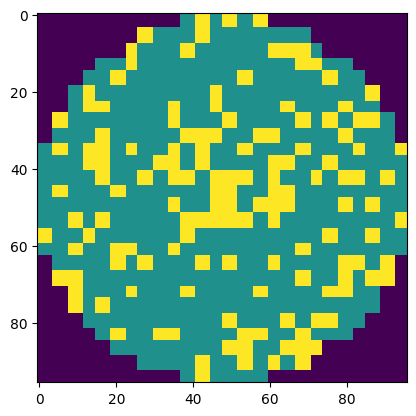

In [97]:
for pair_mode, pair_magnitude in zip(pair_modes, pair_magnitudes):
    print(pair_mode, pair_magnitude)
    hyperparams = [pair_mode[0], pair_magnitude[0], pair_mode[1], pair_magnitude[1]]
    transform = WM811KTransformMultiple(args, hyperparams)
    plt.imshow(transform(image).permute(1,2,0))
    plt.savefig('docs/aug_images/{0}_{1:.2f}_{2}_{3:.2f}.png'.format(pair_mode[0], pair_magnitude[0], pair_mode[1], pair_magnitude[1]))

shift + rotate

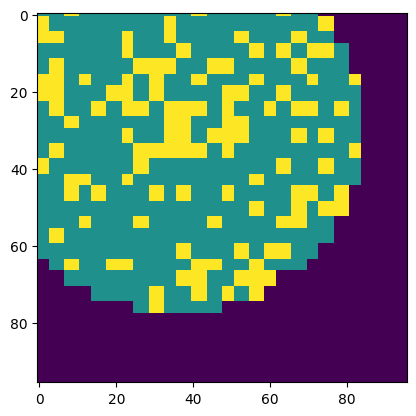

In [98]:
hyperparams = ['shift', 0.2, 'rotate', 0.3]
transform = WM811KTransformMultiple(args, hyperparams)
plt.imshow(transform(image).permute(1,2,0))